In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('Churn_Modelling.csv')

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
df.shape

(10000, 14)

In [20]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [22]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [27]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [28]:
#Label Encoding for columns Geography and Gender
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [30]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9098,473,1,0,32,5,146602.25,2,1,1,72946.95,0
1426,591,0,0,39,4,150500.64,1,1,0,14928.80,0
6478,850,0,1,35,9,102050.47,1,1,1,3769.71,0
39,582,1,1,41,6,70349.48,2,0,1,178074.04,0
7940,781,2,0,29,6,98759.89,1,0,0,112202.64,0


In [31]:
#One hot Encoding
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [32]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
1103,512,0,32,2,123403.85,2,1,0,80120.19,0,1,0
6710,578,1,39,2,0.00,2,1,0,70563.90,0,0,0
6434,628,0,45,8,0.00,2,1,0,193903.06,0,0,0
8357,651,1,34,3,0.00,2,1,1,105599.65,0,0,0
2049,720,0,45,1,102882.40,2,1,1,35633.15,1,0,0


In [33]:
x = df.drop(['Exited'],axis=1)

In [34]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0


In [54]:
y = df['Exited'].values

In [55]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(x)

In [57]:
X

array([[-0.32622142, -1.09598752,  0.29351742, ...,  0.02188649,
        -0.57873591, -0.57380915],
       [-0.44003595, -1.09598752,  0.19816383, ...,  0.21653375,
        -0.57873591,  1.74273971],
       [-1.53679418, -1.09598752,  0.29351742, ...,  0.2406869 ,
        -0.57873591, -0.57380915],
       ...,
       [ 0.60498839, -1.09598752, -0.27860412, ..., -1.00864308,
        -0.57873591, -0.57380915],
       [ 1.25683526,  0.91241915,  0.29351742, ..., -0.12523071,
         1.72790383, -0.57380915],
       [ 1.46377078, -1.09598752, -1.04143285, ..., -1.07636976,
        -0.57873591, -0.57380915]])

In [58]:
#Split data into training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [74]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [75]:
model = Sequential()

In [76]:
X.shape

(10000, 11)

In [78]:
model.add(Dense(11,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
 dense_9 (Dense)             (None, 11)                22        
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 442
Trainable params: 442
Non-trainable 

In [81]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
history=model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.3)

Epoch 1/100
98/98 [==============================] - 1s 3ms/step - loss: 0.5473 - accuracy: 0.7998 - val_loss: 0.5065 - val_accuracy: 0.7933
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7998 - val_loss: 0.4772 - val_accuracy: 0.7933
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7998 - val_loss: 0.4537 - val_accuracy: 0.7933
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7998 - val_loss: 0.4378 - val_accuracy: 0.7933
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.7998 - val_loss: 0.4290 - val_accuracy: 0.7933
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8269 - val_loss: 0.4176 - val_accuracy: 0.8181
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8371 - val_loss: 0.4075 - val_accuracy: 0.8305
Epoch 8/100
9

Epoch 59/100
98/98 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8716 - val_loss: 0.3664 - val_accuracy: 0.8510
Epoch 60/100
98/98 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8722 - val_loss: 0.3663 - val_accuracy: 0.8552
Epoch 61/100
98/98 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8710 - val_loss: 0.3654 - val_accuracy: 0.8543
Epoch 62/100
98/98 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8737 - val_loss: 0.3677 - val_accuracy: 0.8519
Epoch 63/100
98/98 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8733 - val_loss: 0.3679 - val_accuracy: 0.8495
Epoch 64/100
98/98 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8739 - val_loss: 0.3724 - val_accuracy: 0.8557
Epoch 65/100
98/98 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8735 - val_loss: 0.3662 - val_accuracy: 0.8538
Epoch 

In [84]:
y_pred=model.predict(X_test)

94/94 [==============================] - 0s 847us/step


In [86]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


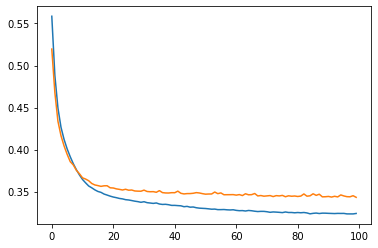

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [68]:
history.history

{'loss': [0.5955063104629517,
  0.49409571290016174,
  0.468619704246521,
  0.45034921169281006,
  0.43542036414146423,
  0.42336300015449524,
  0.41276824474334717,
  0.4029363691806793,
  0.39292895793914795,
  0.3829992115497589,
  0.3730054199695587,
  0.36438876390457153,
  0.3571122884750366,
  0.3517703413963318,
  0.3481895327568054,
  0.34440264105796814,
  0.3421040177345276,
  0.340031236410141,
  0.3381913900375366,
  0.33696314692497253,
  0.3357129693031311,
  0.33466336131095886,
  0.3336271345615387,
  0.33361440896987915,
  0.332392156124115,
  0.33189672231674194,
  0.331279456615448,
  0.33088061213493347,
  0.3304159343242645,
  0.32963693141937256,
  0.32916298508644104,
  0.3287673890590668,
  0.32878515124320984,
  0.327915221452713,
  0.3282265067100525,
  0.32749828696250916,
  0.32685303688049316,
  0.3264707624912262,
  0.32643336057662964,
  0.3264401853084564,
  0.32568827271461487,
  0.3254367411136627,
  0.32458046078681946,
  0.3249879777431488,
  0.3249

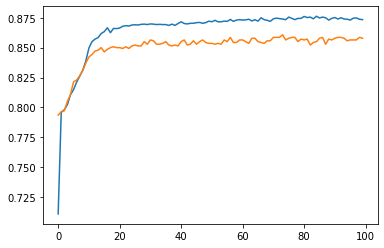

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])